# Interpolación 

**Def.** Dado un conjunto de $n+1$ observaciones $(x_0,y_0), (x_1,y_1), \ldots (x_n,y_n)$ un polinomio $p(x)$ de menor grado que cumple $$p(x_i) = y_i, \qquad\qquad 0 \leq i \leq n$$ se dice que **interpola** al conjunto de datos.
<!-- |  $x$ | $x_0$ | $x_1$ | $\ldots$ | $x_n$ |
|---|--------|--------|------------|--------|
| $y$ | $y_0$ | $y_1$ | $\ldots$ | $y_n$ |-->


### Teorema de interpolación polinomial.
Si $x_0, x_1. . . , x_n$ son números reales distintos, entonces para valores arbitrarios $y_0, y_1,..., y_n$, existe un polinomio único $p_n$ de grado como máximo $n$ tal que
$$p_n(x_i) = y_i \qquad\qquad 0<i<n.$$

# Interpolación de Lagrange


Para un conjunto de observaciones $(x_0,y_0), (x_1,y_1), \ldots (x_n,y_n)$ la idea de Lagrange para calcular el polinomio de interpolación consiste en calcular polinomios con las siguientes características:
1. $L_i(x)$ son polinomios de grado $n$, para cada $i = 0, \ldots, n$.
2. Los polinomios $L_i$ satisfacen que
   $$L_i(x_j) = \left\{ \begin{array}{ll}
                           0 & i \neq j\\
                           1 & i = j\\
   \end{array}\right.$$
3. Polinomios que cumplen las dos condiciones anteriores se define como sigue: 
$$L_i(x_j) = \frac{(x - x_0)(x - x_1) \ldots (x - x_{j-1})(x - x_{j+1}) \ldots (x - x_n)}{(x_j - x_0)(x_j - x_1) \ldots (x_j - x_{j-1})(x_j - x_{j+1}) \ldots (x_j - x_n)} = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}$$ 

<!-- el polinomio de interpolación de Lagrange se definirá como $$p(x) ={ }y_{0}(x) + y_{1} +{ }p_1(x) + \ldots y_n +  L_n(xp_) o de forma euivalente $$p(x) = \sum_{i=0}^n y_i_ ( $ -->


**Teorema.** Si $x_ 0, x_1, \ldots, x_n$ son $n+1$ números distintos y si $f$ es una función cuyos valores están dados en esos números, entonces existe un único polinimio $P(x)$ de grado a lo más $n$, con la propiedad de que $$f(x_k) = P_(x_k) \qquad \text{para cada \;} k = 0, 1 ,\ldots, n.$$ Y este polinimio está dado por $$P(x) = f(x_0)L_0(x) + f(x_1)L_1(x) + \ldots + f(x_n)L_n(x) = \sum_{k=0}^n f(x_k)L_k(x)$$

## Ejemplos
Considere la siguiente tabla de datos 
|x| −1.0| −0.5| 0 |0.5| 1.0|
|------|---------|---------|---------|---------|---------|
y| −1.00| −0.55| 0.00| 0.45| 1.0|  


calcule el polinomio de interpolación de Lagrange.


t*(t - 4)*(t - 1)*(t + 6)*(t + 7)/2640


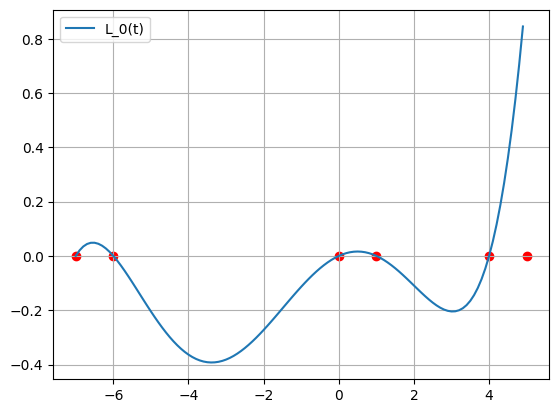

In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Variable simbólica
t = sp. symbols('t')

#Declarar el cunjunto de datos
x = np.array([5,-7,-6,0,1,4])
cero = [0]*len(x)

L0 = (t + 7)*(t + 6)*(t - 0)*(t - 1)*(t - 4)/((5 + 7)*(5 + 6)*(5 - 0)*(5 - 1)*(5 - 4))
print(L0)

x_new = np.arange(-7,5,0.1)
y_new = [L0.subs(t,elem) for elem in x_new]

plt.plot(x_new ,y_new , label = 'L_0(t)')
plt.scatter(x,cero, color = 'red')
plt.legend()
plt.grid()
plt.show()




p(t)= 0.000270562770562771*t*(t - 5)*(t - 4)*(t - 1)*(t + 6) - 0.00108225108225108*t*(t - 5)*(t - 4)*(t - 1)*(t + 7) - 0.00297619047619048*t*(t - 5)*(t - 4)*(t + 6)*(t + 7) - 0.00606060606060606*t*(t - 5)*(t - 1)*(t + 6)*(t + 7) + 0.000378787878787879*t*(t - 4)*(t - 1)*(t + 6)*(t + 7) + 0.0107142857142857*(t - 5)*(t - 4)*(t - 1)*(t + 6)*(t + 7)


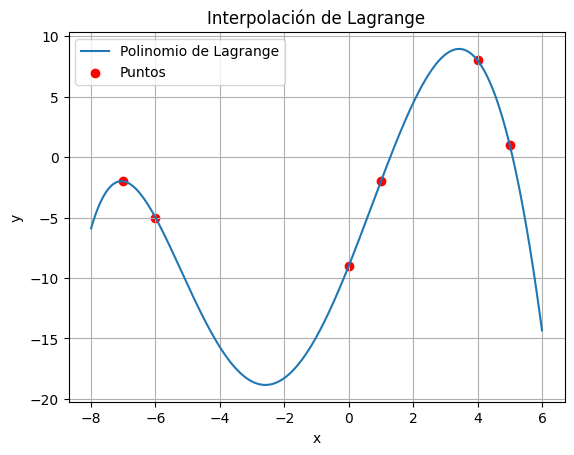

In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Variable simbólica
t = sp. symbols('t')

#Declarar el cunjunto de datos
x = np.array([5,-7,-6,0,1,4])
y = np.array([1,-2,-5,-9,-2,8])
Datos=[[x[i],y[i]] for i in range(len(x))]


# Inicializar coeficientes y polinomios
coefLagrange=[0]*len(Datos)
polLagrange=[0]*len(Datos)

# Calcular los coeficientes y términos del polinomio de Lagrange
for i in range(len(Datos)):
	producto = 1
	pol = 1
	for j in range(len(Datos)):
		if j!=i:
			producto = producto*(Datos[i][0]-Datos[j][0])
			pol = pol*(t - Datos[j][0]) 
	coefLagrange[i] = Datos[i][1]/producto
	polLagrange[i] = coefLagrange[i]*pol

# Sumar los términos para obtener el polinomio completo
p = sum(polLagrange)
print('p(t)=', p)

# Graficar el polinomio
x_new = np.linspace(np.amin(x)-1, np.amax(x)+1, 400)
y_new= [p.subs(t, val) for val in x_new]

plt.plot(x_new, y_new, label='Polinomio de Lagrange')
plt.scatter(x, y, color='red', label='Puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()

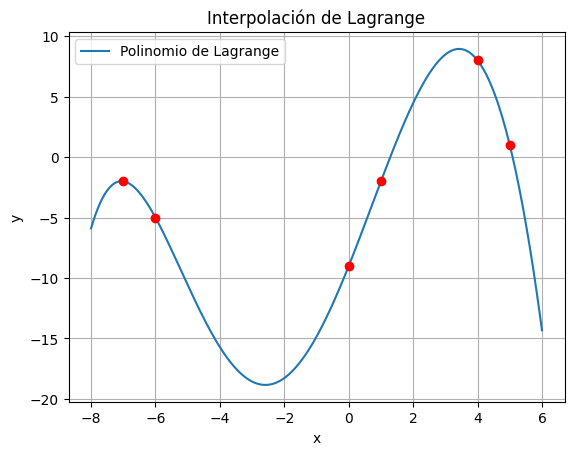

In [23]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

f = lagrange(x, y)

# Graficar el polinomio
x_new = np.linspace(np.amin(x)-1, np.amax(x)+1, 400)
y_new= f(x_new)

plt.plot(x_new, y_new, label='Polinomio de Lagrange')
plt.plot(x, y ,'o',color = 'red')
#plt.scatter(x, y, color='red', label='Puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()